In [2]:
!pip install kaggle

In [3]:
import kagglehub
import shutil

In [4]:
path = kagglehub.dataset_download("emineyetm/fake-news-detection-datasets")
custom_path = r"C:\rakhiact"
shutil.move(path,custom_path)
print("path to combined files:",custom_path)

100%|██████████| 41.0M/41.0M [00:00<00:00, 130MB/s]

Extracting files...


path to combined files: C:\rakhiact


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
fake_news_path =r"/content/C:\rakhiact/News _dataset/Fake.csv"
true_news_path =r"/content/C:\rakhiact/News _dataset/True.csv"

In [10]:
fake_news_df = pd.read_csv(fake_news_path)
true_news_df = pd.read_csv(true_news_path)

In [12]:
print(fake_news_df.head())
print(true_news_df.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept t

In [14]:
import matplotlib.pyplot as plt

In [16]:
category_data = pd.DataFrame({
    "category": ['A', 'B', 'C', 'D'],
    "values": [23, 45, 12, 30]
})

In [18]:
category_data

,category,values
0,A,23
1,B,45
2,C,12
3,D,30


<BarContainer object of 4 artists>

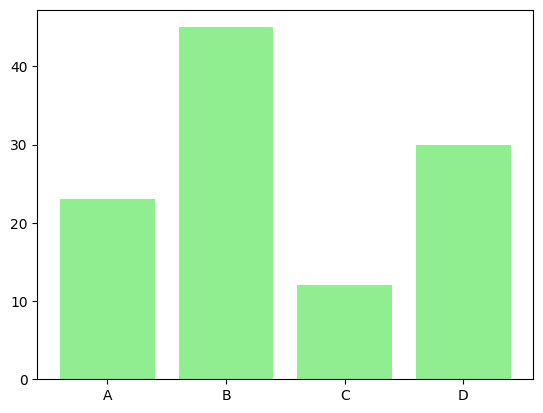

In [20]:
plt.bar(category_data['category'], category_data['values'], color='lightgreen')

In [22]:
scatter_data = pd.DataFrame({
    "x": np.random.rand(100),
    "y": np.random.rand(100)
})

In [24]:
print(scatter_data.head())

          x         y
0  0.034473  0.302771
1  0.614188  0.402096
2  0.467973  0.377270
3  0.652079  0.713341
4  0.161684  0.540042


In [26]:
import pandas as pd
import numpy as np

In [27]:
fake_news_df['label'] = "Fake"
true_news_df['label'] = "True"

In [28]:
combined_df = pd.concat([fake_news_df, true_news_df], ignore_index=True)

In [29]:
len(combined_df)

44898

In [30]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [31]:
combined_df['label'].value_counts()

,count
label,
Fake,23481
True,21417


In [32]:
combined_df['title_length']=combined_df['title'].astype(str).apply(len)
combined_df['text_length']=combined_df['text'].astype(str).apply(len)

In [33]:
combined_df['title_length'].describe()

,title_length
count,44898.000000
mean,80.111720
std,25.379685
min,8.000000
25%,63.000000
50%,73.000000
75%,91.000000
max,286.000000


In [34]:
combined_df['text_length'].describe()

,text_length
count,44898.000000
mean,2469.109693
std,2171.617091
min,1.000000
25%,1234.000000
50%,2186.000000
75%,3105.000000
max,51794.000000


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [36]:
data = np.random.normal(loc=50, scale=15, size=100)

In [37]:
combined_df["subject"].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

In [38]:
grouped = combined_df.groupby("subject")["label"].value_counts()
print(grouped)

subject          label
Government News  Fake      1570
Middle-east      Fake       778
News             Fake      9050
US_News          Fake       783
left-news        Fake      4459
politics         Fake      6841
politicsNews     True     11272
worldnews        True     10145
Name: count, dtype: int64


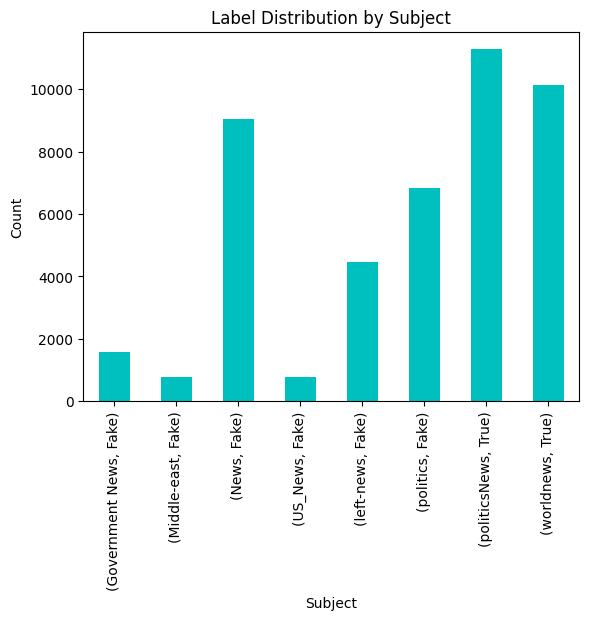

In [40]:
grouped.plot(kind='bar', color="c")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.title("Label Distribution by Subject")
plt.show()

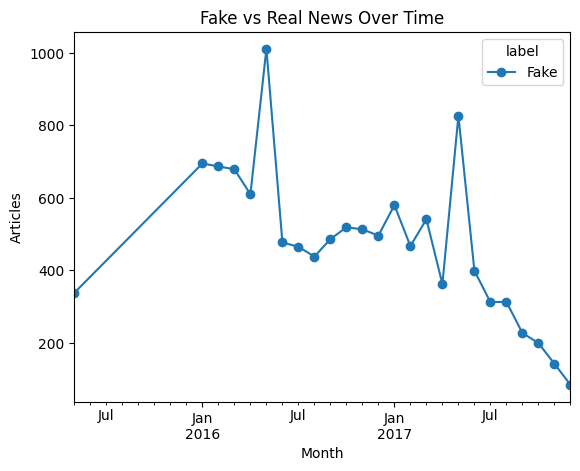

In [41]:
combined_df['date'] = pd.to_datetime(combined_df['date'],errors = 'coerce')
month = combined_df['date'].dt.to_period('M')
combined_df.groupby([month, "label"]).size().unstack().plot(kind='line', marker='o')
plt.xlabel("Month")
plt.ylabel("Articles")
plt.title("Fake vs Real News Over Time")
plt.show()

In [42]:
combined_df["text_length"] = combined_df["text"].apply(len)
combined_df["text_length"] = combined_df["title"].apply(len)

In [43]:
combined_df.head()

,title,text,subject,date,label,title_length,text_length
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,Fake,79,79
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,Fake,69,69
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,Fake,90,90
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,Fake,78,78
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,Fake,70,70


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-45-1e884b86320d>:2: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.boxplot(data=combined_df, x="label", y="title_length", hue="label", palette=palette, legend=False)


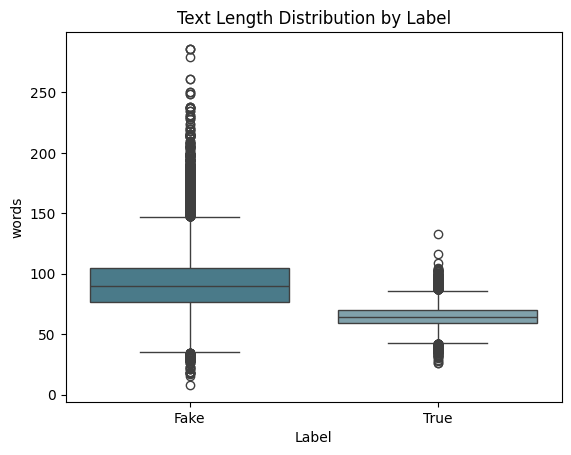

In [45]:
palette = sns.diverging_palette(220, 20, n=7)
sns.boxplot(data=combined_df, x="label", y="title_length", hue="label", palette=palette, legend=False)
plt.xlabel("Label")
plt.ylabel("words")
plt.title("Text Length Distribution by Label")
plt.show()

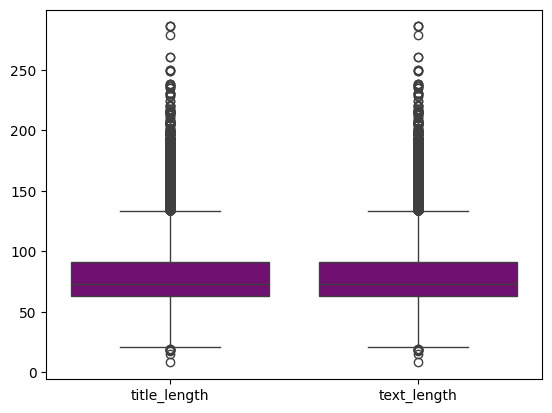

In [46]:
sns.boxplot(data=combined_df,color="purple")
plt.show()

<ipython-input-47-460d7229adbb>:2: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.histplot(data=combined_df, x="text_length", hue="label", palette=palette, legend=False)


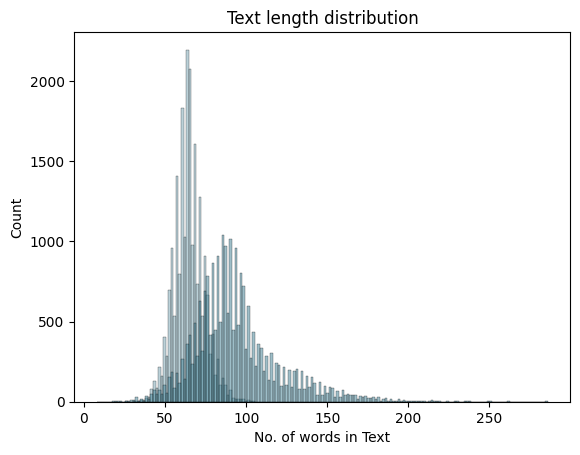

In [47]:
palette = sns.diverging_palette(220, 20, n=7)
sns.histplot(data=combined_df, x="text_length", hue="label", palette=palette, legend=False)
plt.xlabel("No. of words in Text")
plt.title("Text length distribution")
plt.show()

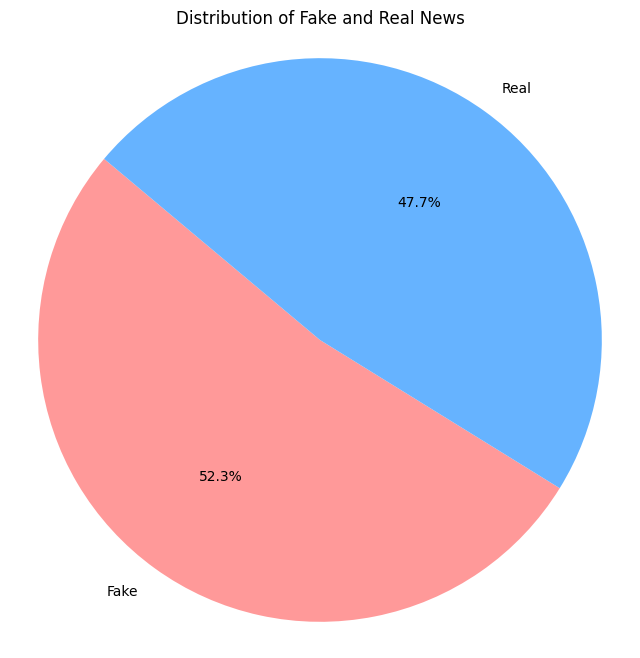

In [48]:
fake_news_df['label'] = "Fake"
true_news_df['label'] = "Real"

combined_df = pd.concat([fake_news_df, true_news_df], ignore_index=True)

label_counts = combined_df['label'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'])
plt.axis('equal')
plt.title('Distribution of Fake and Real News')
plt.show()

In [49]:
import nltk


In [50]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


In [52]:
# Ensure required NLTK resources are available
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
# Label the datasets and merge them
# Label the datasets and merge them
fake_news_df['label'] = 0  # Label for fake news
true_news_df['label'] = 1  # Label for true news
df = pd.concat([fake_news_df,true_news_df],ignore_index=True)

In [58]:
# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back to a single string
    return ' '.join(tokens)


In [59]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [60]:
# Apply preprocessing to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)



In [61]:
# Display a few examples of the processed text
df[['text', 'processed_text']].head()

,text,processed_text
0,Donald Trump just couldn t wish all Americans ...,donald trump wish american happy new year leav...
1,House Intelligence Committee Chairman Devin Nu...,house intelligence committee chairman devin nu...
2,"On Friday, it was revealed that former Milwauk...",friday revealed former milwaukee sheriff david...
3,"On Christmas day, Donald Trump announced that ...",christmas day donald trump announced would bac...
4,Pope Francis used his annual Christmas Day mes...,pope francis used annual christmas day message...
